In [126]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantstats as qs
plt.rcParams["figure.figsize"]=(20,10) #to set the graph range


In [127]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(20,10) #to set the graph range


In [128]:
#Momentum Investing deals with capitalising on the current trends in the market
#financial data has a lot of noise in it, be careful while using ML
file_path="/Users/sahil/Downloads/ind_nifty500list.csv"
Stocks=pd.read_csv(file_path)
Stocks

Company Name                    Industry      Symbol Series  \
0           360 ONE WAM Ltd.          Financial Services      360ONE     EQ   
1              3M India Ltd.                 Diversified     3MINDIA     EQ   
2             ABB India Ltd.               Capital Goods         ABB     EQ   
3                   ACC Ltd.      Construction Materials         ACC     EQ   
4       AIA Engineering Ltd.               Capital Goods      AIAENG     EQ   
..                       ...                         ...         ...    ...   
496  Zensar Technolgies Ltd.      Information Technology  ZENSARTECH     EQ   
497              Zomato Ltd.           Consumer Services      ZOMATO     EQ   
498  Zydus Lifesciences Ltd.                  Healthcare   ZYDUSLIFE     EQ   
499      Zydus Wellness Ltd.  Fast Moving Consumer Goods   ZYDUSWELL     EQ   
500     eClerx Services Ltd.                    Services      ECLERX     EQ   

        ISIN Code  
0    INE466L01038  
1    INE470A01017  
2    INE117A01022  
3    INE012A01025  
4    INE212H01026  
..            ...  
496  INE520A01027  
497  INE758T01015  
498  INE010B01027  
499  INE768C01010  
500  INE738I01010  

[501 rows x 5 columns]

In [129]:
Stocks.sort_values(["Industry"])

Company Name                        Industry  \
427         Suprajit Engineering Ltd.  Automobile and Auto Components   
151             Exide Industries Ltd.  Automobile and Auto Components   
145       Endurance Technologies Ltd.  Automobile and Auto Components   
36                  Apollo Tyres Ltd.  Automobile and Auto Components   
315  Motherson Sumi Wiring India Ltd.  Automobile and Auto Components   
..                                ...                             ...   
28               Alok Industries Ltd.                        Textiles   
263                  K.P.R. Mill Ltd.                        Textiles   
292               Lux Industries Ltd.                        Textiles   
461                      Trident Ltd.                        Textiles   
385                      Raymond Ltd.                        Textiles   

         Symbol Series     ISIN Code  
427    SUPRAJIT     EQ  INE399C01030  
151    EXIDEIND     EQ  INE302A01020  
145   ENDURANCE     EQ  INE913H01037  
36   APOLLOTYRE     EQ  INE438A01022  
315       MSUMI     EQ  INE0FS801015  
..          ...    ...           ...  
28     ALOKINDS     BE  INE270A01029  
263     KPRMILL     EQ  INE930H01031  
292      LUXIND     EQ  INE150G01020  
461     TRIDENT     EQ  INE064C01022  
385     RAYMOND     EQ  INE301A01014  

[501 rows x 5 columns]

In [5]:
Stocks["Symbol"]=Stocks["Symbol"]+str(".ns")
Stocks

Company Name                    Industry         Symbol  \
0           360 ONE WAM Ltd.          Financial Services      360ONE.ns   
1              3M India Ltd.                 Diversified     3MINDIA.ns   
2             ABB India Ltd.               Capital Goods         ABB.ns   
3                   ACC Ltd.      Construction Materials         ACC.ns   
4       AIA Engineering Ltd.               Capital Goods      AIAENG.ns   
..                       ...                         ...            ...   
496  Zensar Technolgies Ltd.      Information Technology  ZENSARTECH.ns   
497              Zomato Ltd.           Consumer Services      ZOMATO.ns   
498  Zydus Lifesciences Ltd.                  Healthcare   ZYDUSLIFE.ns   
499      Zydus Wellness Ltd.  Fast Moving Consumer Goods   ZYDUSWELL.ns   
500     eClerx Services Ltd.                    Services      ECLERX.ns   

    Series     ISIN Code  
0       EQ  INE466L01038  
1       EQ  INE470A01017  
2       EQ  INE117A01022  
3       EQ  INE012A01025  
4       EQ  INE212H01026  
..     ...           ...  
496     EQ  INE520A01027  
497     EQ  INE758T01015  
498     EQ  INE010B01027  
499     EQ  INE768C01010  
500     EQ  INE738I01010  

[501 rows x 5 columns]

In [6]:
stocks_list=Stocks['Symbol'].to_list() #used to convert pandas series to a list
DataSet=yf.download(tickers=stocks_list,start="2012-1-1")

[*********************100%%**********************]  501 of 501 completed


In [7]:
DataSet.to_pickle('closingprices.pkl')
df_read=pd.read_pickle('closingprices.pkl')
pd.read_pickle('closingprices.pkl')

Price        Adj Close                                                       \
Ticker       360ONE.NS    3MINDIA.NS AARTIDRUGS.NS AARTIIND.NS     AAVAS.NS   
Date                                                                          
2012-01-02         NaN   3317.898926      7.865219    9.402609          NaN   
2012-01-03         NaN   3325.399658      8.220589    9.501579          NaN   
2012-01-04         NaN   3362.999023      8.142199    9.422400          NaN   
2012-01-05         NaN   3467.960449      8.037681    9.422400          NaN   
2012-01-06         NaN   3494.790039      8.288527    9.481785          NaN   
...                ...           ...           ...         ...          ...   
2024-03-14  696.700012  30133.150391    458.700012  645.900024  1378.900024   
2024-03-15         NaN           NaN    452.750000  634.900024  1364.449951   
2024-03-18  689.650024  29516.099609    452.950012  645.349976  1378.300049   
2024-03-19  692.599976  29678.900391    445.899994  635.750000  1371.000000   
2024-03-20  673.750000  30038.949219    437.700012  635.099976  1351.250000   

Price                                                                        \
Ticker           ABB.NS ABBOTINDIA.NS ABCAPITAL.NS    ABFRL.NS       ACC.NS   
Date                                                                          
2012-01-02   504.718506   1341.109497          NaN         NaN   959.366455   
2012-01-03   514.957031   1325.982300          NaN         NaN   963.452332   
2012-01-04   517.126160   1321.869263          NaN         NaN   930.261780   
2012-01-05   515.564514   1321.092285          NaN         NaN   937.295715   
2012-01-06   505.803131   1320.772339          NaN         NaN   929.250916   
...                 ...           ...          ...         ...          ...   
2024-03-14  5625.399902  28308.099609   173.050003  201.000000  2482.100098   
2024-03-15  5616.549805  28404.349609   173.800003  207.350006  2502.949951   
2024-03-18  5766.750000  28604.150391   172.899994  208.149994  2441.550049   
2024-03-19  5628.600098  28291.500000   170.000000  206.699997  2403.399902   
2024-03-20  5733.700195  27688.800781   169.050003  202.149994  2397.699951   

Price       ...      Volume                                                   \
Ticker      ... WESTLIFE.NS WHIRLPOOL.NS   WIPRO.NS   YESBANK.NS     ZEEL.NS   
Date        ...                                                                
2012-01-02  ...         NaN      83616.0  1708458.0   16278750.0    595675.0   
2012-01-03  ...         NaN     123819.0  5764897.0   21337225.0    831590.0   
2012-01-04  ...         NaN     102847.0  5075777.0   19977935.0    289594.0   
2012-01-05  ...         NaN       8311.0  3031457.0   16636020.0    756827.0   
2012-01-06  ...         NaN       7173.0  3327636.0   16571055.0    933489.0   
...         ...         ...          ...        ...          ...         ...   
2024-03-14  ...    168484.0      87755.0  6412736.0  619816481.0  16457230.0   
2024-03-15  ...         NaN          NaN  6824543.0  535542732.0  19414252.0   
2024-03-18  ...     59751.0     133266.0  3196980.0  258256717.0  10919077.0   
2024-03-19  ...     20406.0     131632.0  4808693.0  215509042.0  10707225.0   
2024-03-20  ...    274976.0     147330.0  4189569.0  193870164.0  15680359.0   

Price                                                                        
Ticker     ZENSARTECH.NS ZFCVINDIA.NS   ZOMATO.NS ZYDUSLIFE.NS ZYDUSWELL.NS  
Date                                                                         
2012-01-02       19125.0        465.0         NaN     118290.0       4608.0  
2012-01-03       38225.0        882.0         NaN     204505.0       7380.0  
2012-01-04       41045.0      28170.0         NaN     240655.0       8303.0  
2012-01-05       18015.0      31572.0         NaN      79615.0      24150.0  
2012-01-06       17610.0       4388.0         NaN     451175.0       4232.0  
...                  ...          ...    

In [10]:
DataSet=DataSet["Close"]

KeyError: 'Close'

In [69]:
DataSet
#Dataset.dropna(axis=1) it works column wise (if a column has a single NA, it will get deleted)

Ticker       360ONE.NS    3MINDIA.NS  AARTIDRUGS.NS  AARTIIND.NS     AAVAS.NS  \
Date                                                                            
2012-01-02         NaN   3450.300049       9.406250    11.542226          NaN   
2012-01-03         NaN   3458.100098       9.831250    11.663723          NaN   
2012-01-04         NaN   3497.199951       9.737500    11.566525          NaN   
2012-01-05         NaN   3606.350098       9.612500    11.566525          NaN   
2012-01-06         NaN   3634.250000       9.912500    11.639423          NaN   
...                ...           ...            ...          ...          ...   
2024-03-14  696.700012  30133.150391     458.700012   645.900024  1378.900024   
2024-03-15         NaN           NaN     452.750000   634.900024  1364.449951   
2024-03-18  689.650024  29516.099609     452.950012   645.349976  1378.300049   
2024-03-19  692.599976  29678.900391     445.899994   635.750000  1371.000000   
2024-03-20  673.750000  30038.949219     437.700012   635.099976  1351.250000   

Ticker           ABB.NS  ABBOTINDIA.NS  ABCAPITAL.NS    ABFRL.NS       ACC.NS  \
Date                                                                            
2012-01-02   528.101379    1467.250000           NaN         NaN  1138.849976   
2012-01-03   538.814148    1450.699951           NaN         NaN  1143.699951   
2012-01-04   541.083801    1446.199951           NaN         NaN  1104.300049   
2012-01-05   539.449646    1445.349976           NaN         NaN  1112.650024   
2012-01-06   529.236206    1445.000000           NaN         NaN  1103.099976   
...                 ...            ...           ...         ...          ...   
2024-03-14  5625.399902   28308.099609    173.050003  201.000000  2482.100098   
2024-03-15  5616.549805   28404.349609    173.800003  207.350006  2502.949951   
2024-03-18  5766.750000   28604.150391    172.899994  208.149994  2441.550049   
2024-03-19  5628.600098   28291.500000    170.000000  206.699997  2403.399902   
2024-03-20  5733.700195   27688.800781    169.050003  202.149994  2397.699951   

Ticker      ...  WESTLIFE.NS  WHIRLPOOL.NS    WIPRO.NS  YESBANK.NS  \
Date        ...                                                      
2012-01-02  ...          NaN    148.550003  149.625031   46.369999   
2012-01-03  ...          NaN    146.699997  156.187546   49.180000   
2012-01-04  ...          NaN    144.500000  156.843796   48.209999   
2012-01-05  ...          NaN    145.600006  155.606293   49.570000   
2012-01-06  ...          NaN    147.649994  152.156281   49.959999   
...         ...          ...           ...         ...         ...   
2024-03-14  ...   739.799988   1257.949951  517.950012   23.450001   
2024-03-15  ...          NaN           NaN  517.000000   23.799999   
2024-03-18  ...   740.250000   1262.650024  510.200012   23.450001   
2024-03-19  ...   730.799988   1270.900024  494.850006   22.950001   
2024-03-20  ...   742.400024   1261.300049  493.500000   23.049999   

Ticker         ZEEL.NS  ZENSARTECH.NS  ZFCVINDIA.NS   ZOMATO.NS  ZYDUSLIFE.NS  \
Date                                                                            
2012-01-02  116.800003      28.530001   1199.800049         NaN    141.210007   
2012-01-03  118.099998      29.209999   1184.000000         NaN    139.490005   
2012-01-04  116.900002      28.389999   1192.800049         NaN    138.449997   
2012-01-05  117.000000      27.920000   1192.050049         NaN    138.240005   
2012-01-06  115.949997      27.469999   1197.650024         NaN    136.080002   
...                ...            ...           ...         ...           ...   
2024-03-14  146.899994     551.950012  14187.099609  152.750000    995.299988   
2024-03-15  141.699997     554.150024  15505.349609  160.050003    983.900024   
2024-03-18  142.949997     583.549988  15787.099609  158.250000    991.250000   
2024-03-19  140.699997     578.299988  15727.200195  157.949997    969.849976   
2024-03-2

In [13]:
#Benchmark=reference to compare returns

In [70]:
PercentageChange=DataSet.pct_change()
Index=PercentageChange.mean(axis=1)

In [71]:
#Nifty=Weighted average returns for top 50 stocks
#calulcation of index = weighted average of all 50 stocks

In [72]:
Index #Pandas Series

Date
2012-01-02         NaN
2012-01-03    0.026503
2012-01-04    0.004305
2012-01-05    0.001793
2012-01-06   -0.000697
                ...   
2024-03-14    0.025771
2024-03-15   -0.000631
2024-03-18    0.000949
2024-03-19   -0.011337
2024-03-20    0.000221
Length: 3016, dtype: float64

# Momentum Investing

In [73]:
#Vanilla Momentum Investing
#Check previous year returns
#rank the stocks
#take a long position in the first 20 stocks
#Repeat the same cycle on a rolling basis

In [74]:
prevDataSet=DataSet[0:252] #taking the first 252 days and then percentage change
pyd_pct_change=prevDataSet.pct_change()

In [75]:
Ranks=np.cumprod(1+pyd_pct_change).tail(1).T
Ranks

Date           2013-01-04
Ticker                   
360ONE.NS             NaN
3MINDIA.NS       1.202780
AARTIDRUGS.NS    2.932890
AARTIIND.NS      2.140000
AAVAS.NS              NaN
...                   ...
ZENSARTECH.NS    1.986330
ZFCVINDIA.NS     1.360227
ZOMATO.NS             NaN
ZYDUSLIFE.NS     1.261242
ZYDUSWELL.NS     1.333246

[501 rows x 1 columns]

In [76]:
#download volume, multiply volume by stock price to get close to the same weight as an estimate, take monthly average

In [77]:
common_indices=DataSet.index.intersection(Index.index)
DataSet=DataSet.loc[common_indices]
Index=Index.loc[common_indices]

In [88]:
lst=[]
indices=[]
for i in range(0,len(DataSet)-252,22):# here its -44 since its 13 month sliding window and year wise so steps of 22
    prevDataSet=DataSet[0+i:252+i]
    prevYearIndex=Index[0+i:252+i]
    Index_pct_change=np.cumprod(1+Index[0+i:252+1])-1
    Prev_Index_Return=Index_pct_change.iloc[-1]#taking the first 252 days and then percentage change
    pyd_pct_change=prevDataSet.pct_change()
    Ranks=np.cumprod(1+pyd_pct_change).tail(1).T #List of Stocks
    MomentumPicks=Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna().index[0:25].to_list()
    nextMonth=DataSet[252+i:252+22+i] #Next Month 
    print(MomentumPicks)
    #Since we want the data of our 5 stocks of interest, we can do this
    #(np.cumprod(1+nextMonth[MomentumPicks].pct_change())-1).iloc[-1].mean()#Mean portfolio return
    #MonthlyReturn=(np.cumprod(1+nextMonth[MomentumPicks].pct_change())-1).iloc[-1].mean() #Should be a float
    monthlyIndices=nextMonth.pct_change().mean(axis=1).index
    Returns=nextMonth.pct_change().mean(axis=1).fillna(0).values
    #MonthDate=nextMonth.index[-1]
    if(Prev_Index_Return>0.05):
        lst.extend((Returns))
    else:
        lst.extend(0*Returns)
    indices.extend(monthlyIndices)

['MINDACORP.NS', 'JKLAKSHMI.NS', 'VAIBHAVGBL.NS', 'MCDOWELL-N.NS', 'JKCEMENT.NS', 'RELAXO.NS', 'VGUARD.NS', 'ATUL.NS', 'ASTRAL.NS', 'AARTIDRUGS.NS', 'CCL.NS', 'GRANULES.NS', 'AJANTPHARM.NS', 'PRESTIGE.NS', 'CERA.NS', 'WELSPUNLIV.NS', 'CHOLAFIN.NS', 'KAJARIACER.NS', 'BRIGADE.NS', 'UBL.NS', 'RAMCOCEM.NS', 'AUROPHARMA.NS', 'BAJFINANCE.NS', 'VINATIORGA.NS', 'BAJAJFINSV.NS']
['MINDACORP.NS', 'AJANTPHARM.NS', 'VAIBHAVGBL.NS', 'JKLAKSHMI.NS', 'MCDOWELL-N.NS', 'JKCEMENT.NS', 'VGUARD.NS', 'PRESTIGE.NS', 'CCL.NS', 'ASTRAL.NS', 'AARTIDRUGS.NS', 'CERA.NS', 'RELAXO.NS', 'ATUL.NS', 'ALKYLAMINE.NS', 'SHREECEM.NS', 'RAMCOCEM.NS', 'BERGEPAINT.NS', 'APLLTD.NS', 'CHOLAFIN.NS', 'BAJAJFINSV.NS', 'UBL.NS', 'ZEEL.NS', 'PIDILITIND.NS', 'MASTEK.NS']
['MINDACORP.NS', 'MCDOWELL-N.NS', 'AJANTPHARM.NS', 'VGUARD.NS', 'VAIBHAVGBL.NS', 'ASTRAL.NS', 'JKCEMENT.NS', 'APLLTD.NS', 'RELAXO.NS', 'AARTIDRUGS.NS', 'CERA.NS', 'JKLAKSHMI.NS', 'ALKYLAMINE.NS', 'BERGEPAINT.NS', 'WELSPUNLIV.NS', 'CCL.NS', 'PERSISTENT.NS', 'ATUL.NS

IndexError: single positional indexer is out-of-bounds

In [95]:
lst=[]
indices=[]
for i in range(0,len(DataSet)-(252),22):
    prevYearDataSet = DataSet[0+i:252+i]
    prevYearIndex = Index[0+i:252+i]
    Index_pct_change = np.cumprod(1+Index[0+i:252+i]) -1
    Prev_Index_Return = Index_pct_change.iloc[-1]
    pyd_pct_change = prevYearDataSet.pct_change()
    Ranks=np.cumprod(1 + pyd_pct_change).tail(1).T
    Momentum_picks=Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna().index[0:25].to_list()
    nextMonth=DataSet[252+i:252+22+i]
    print(Momentum_picks)
    monthlyIndices = nextMonth.pct_change().mean(axis=1).index 
    returns = nextMonth.pct_change().mean(axis=1).fillna(0).values
    if(Prev_Index_Return>0.05):
        lst.extend(returns)
    else:
        lst.extend(0*returns)
    indices.extend(monthlyIndices)

['MINDACORP.NS', 'JKLAKSHMI.NS', 'VAIBHAVGBL.NS', 'MCDOWELL-N.NS', 'JKCEMENT.NS', 'RELAXO.NS', 'VGUARD.NS', 'ATUL.NS', 'ASTRAL.NS', 'AARTIDRUGS.NS', 'CCL.NS', 'GRANULES.NS', 'AJANTPHARM.NS', 'PRESTIGE.NS', 'CERA.NS', 'WELSPUNLIV.NS', 'CHOLAFIN.NS', 'KAJARIACER.NS', 'BRIGADE.NS', 'UBL.NS', 'RAMCOCEM.NS', 'AUROPHARMA.NS', 'BAJFINANCE.NS', 'VINATIORGA.NS', 'BAJAJFINSV.NS']
['MINDACORP.NS', 'AJANTPHARM.NS', 'VAIBHAVGBL.NS', 'JKLAKSHMI.NS', 'MCDOWELL-N.NS', 'JKCEMENT.NS', 'VGUARD.NS', 'PRESTIGE.NS', 'CCL.NS', 'ASTRAL.NS', 'AARTIDRUGS.NS', 'CERA.NS', 'RELAXO.NS', 'ATUL.NS', 'ALKYLAMINE.NS', 'SHREECEM.NS', 'RAMCOCEM.NS', 'BERGEPAINT.NS', 'APLLTD.NS', 'CHOLAFIN.NS', 'BAJAJFINSV.NS', 'UBL.NS', 'ZEEL.NS', 'PIDILITIND.NS', 'MASTEK.NS']
['MINDACORP.NS', 'MCDOWELL-N.NS', 'AJANTPHARM.NS', 'VGUARD.NS', 'VAIBHAVGBL.NS', 'ASTRAL.NS', 'JKCEMENT.NS', 'APLLTD.NS', 'RELAXO.NS', 'AARTIDRUGS.NS', 'CERA.NS', 'JKLAKSHMI.NS', 'ALKYLAMINE.NS', 'BERGEPAINT.NS', 'WELSPUNLIV.NS', 'CCL.NS', 'PERSISTENT.NS', 'ATUL.NS

In [103]:
lst=[]
indices=[]
for i in range(0,len(DataSet)-(252),22):
    prevYearDataSet = DataSet[0+i:252+i]
    prevYearIndex = Index[0+i:252+i]
    Index_pct_change = np.cumprod(1+Index[0+i:252+i]) -1
    Prev_Index_Return = Index_pct_change.iloc[-1]
    pyd_pct_change = prevYearDataSet.pct_change()
    Ranks=np.cumprod(1 + pyd_pct_change).tail(1).T
    Momentum_picks=Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna().index[0:25].to_list()
    nextMonth=DataSet[252+i:252+22+i]
    print(Momentum_picks)
    monthlyIndices = nextMonth.pct_change().mean(axis=1).index 
    returns = nextMonth.pct_change().mean(axis=1).fillna(0).values
    if(Prev_Index_Return<0): #If returns are less than 0, the hypothesis is that stock will bounce back
        #May not be a good investment strategy but maybe a long filter(?)
        lst.extend(returns)
    else:
        lst.extend(0*returns)
    indices.extend(monthlyIndices)

['MINDACORP.NS', 'JKLAKSHMI.NS', 'VAIBHAVGBL.NS', 'MCDOWELL-N.NS', 'JKCEMENT.NS', 'RELAXO.NS', 'VGUARD.NS', 'ATUL.NS', 'ASTRAL.NS', 'AARTIDRUGS.NS', 'CCL.NS', 'GRANULES.NS', 'AJANTPHARM.NS', 'PRESTIGE.NS', 'CERA.NS', 'WELSPUNLIV.NS', 'CHOLAFIN.NS', 'KAJARIACER.NS', 'BRIGADE.NS', 'UBL.NS', 'RAMCOCEM.NS', 'AUROPHARMA.NS', 'BAJFINANCE.NS', 'VINATIORGA.NS', 'BAJAJFINSV.NS']
['MINDACORP.NS', 'AJANTPHARM.NS', 'VAIBHAVGBL.NS', 'JKLAKSHMI.NS', 'MCDOWELL-N.NS', 'JKCEMENT.NS', 'VGUARD.NS', 'PRESTIGE.NS', 'CCL.NS', 'ASTRAL.NS', 'AARTIDRUGS.NS', 'CERA.NS', 'RELAXO.NS', 'ATUL.NS', 'ALKYLAMINE.NS', 'SHREECEM.NS', 'RAMCOCEM.NS', 'BERGEPAINT.NS', 'APLLTD.NS', 'CHOLAFIN.NS', 'BAJAJFINSV.NS', 'UBL.NS', 'ZEEL.NS', 'PIDILITIND.NS', 'MASTEK.NS']
['MINDACORP.NS', 'MCDOWELL-N.NS', 'AJANTPHARM.NS', 'VGUARD.NS', 'VAIBHAVGBL.NS', 'ASTRAL.NS', 'JKCEMENT.NS', 'APLLTD.NS', 'RELAXO.NS', 'AARTIDRUGS.NS', 'CERA.NS', 'JKLAKSHMI.NS', 'ALKYLAMINE.NS', 'BERGEPAINT.NS', 'WELSPUNLIV.NS', 'CCL.NS', 'PERSISTENT.NS', 'ATUL.NS

In [104]:
FinalData=pd.DataFrame(lst,columns=["Returns"],index=indices)
FinalData

Returns
2013-01-07      0.0
2013-01-08     -0.0
2013-01-09     -0.0
2013-01-10     -0.0
2013-01-11     -0.0
...             ...
2024-03-14      0.0
2024-03-15     -0.0
2024-03-18      0.0
2024-03-19     -0.0
2024-03-20      0.0

[2764 rows x 1 columns]

In [105]:
#FinalData.set_index("Date",inplace=True) #To Set the date as index
#FinalData

<Axes: >

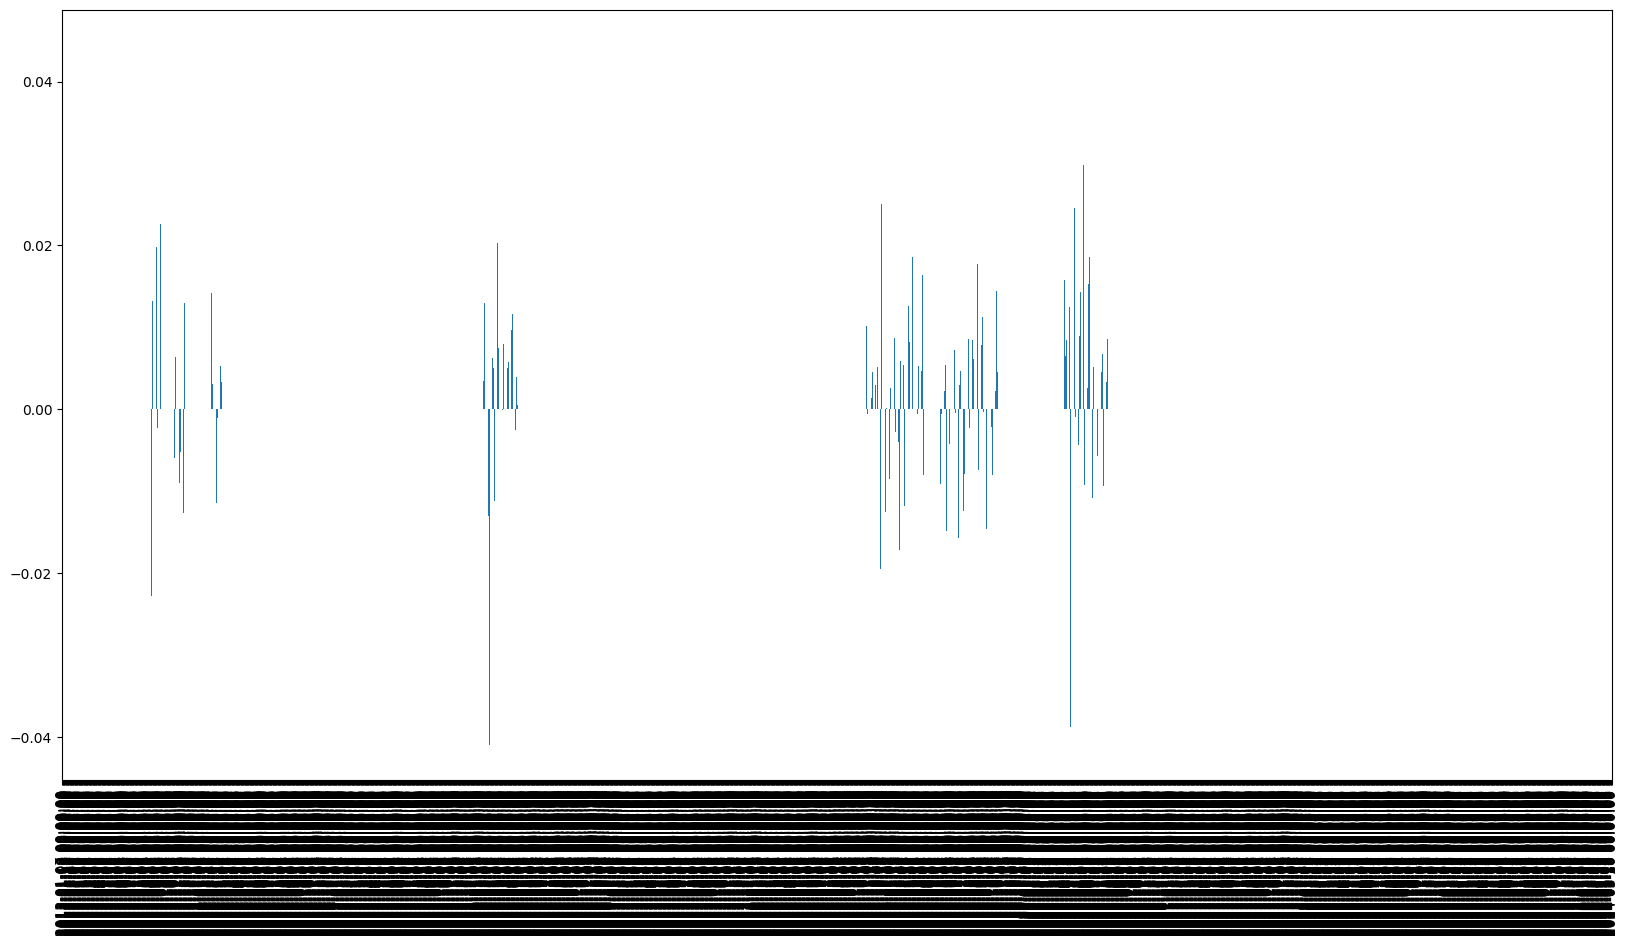

In [106]:
FinalData['Returns'].plot.bar()

In [107]:
(FinalData).std()
#Sharpe Ratio
FinalData.mean()/FinalData.std()


Returns    0.067216
dtype: float64

In [108]:
#Sharpe Ratio of Index
Index.mean()/Index.std()

0.09567442522155256

<Axes: xlabel='Date'>

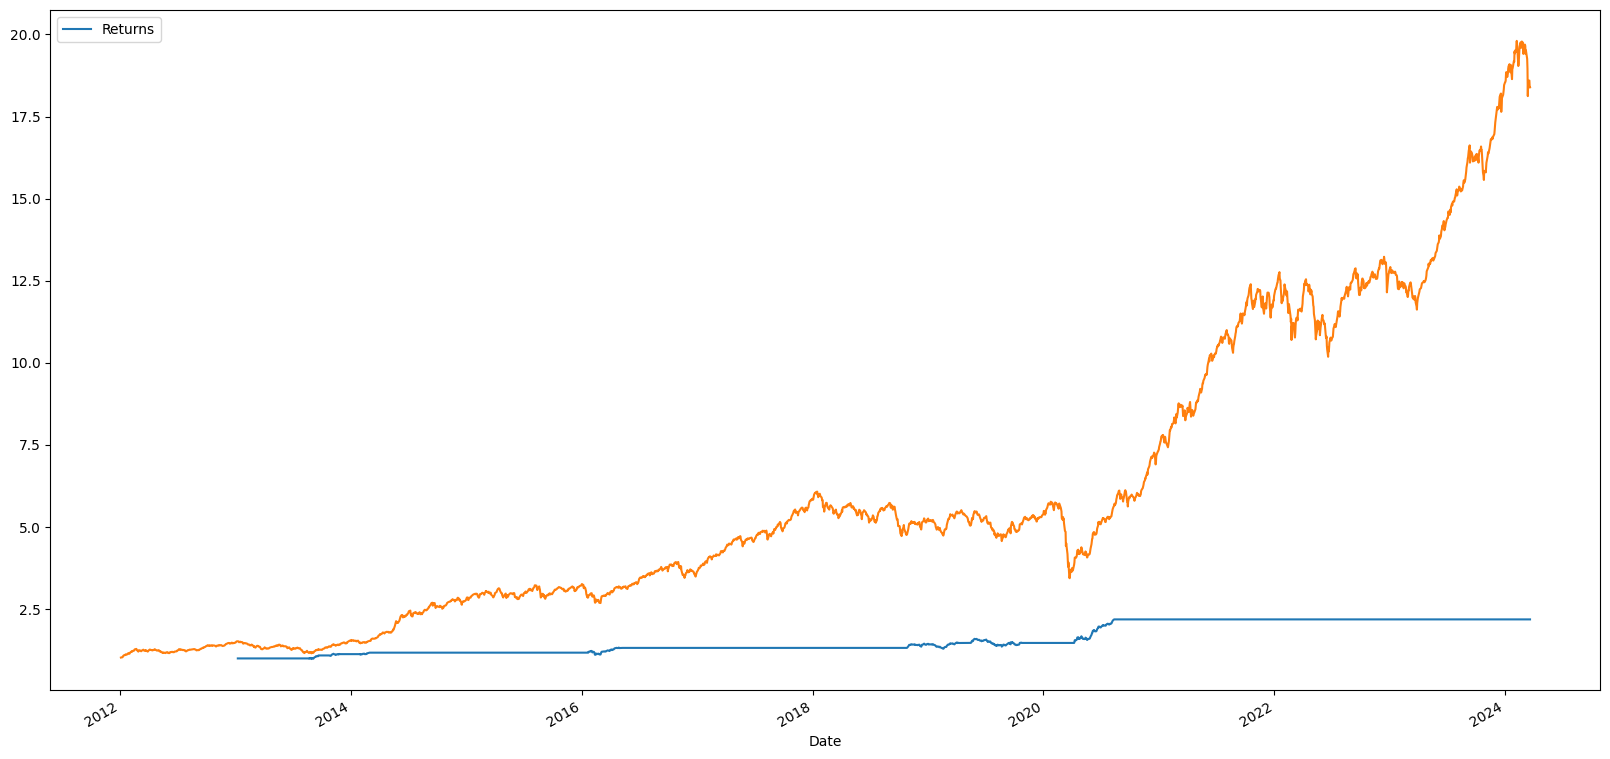

In [110]:
#Our strategy is more volatile than the standard Index but also higher returns, so volatility is worth it
np.cumprod(1+FinalData).plot()
np.cumprod(1+Index).plot()

In [102]:
#Right now the data is for monthly returns, but this misses out on volatility of daily returns

In [66]:
nextMonth.pct_change().mean(axis=1)

Date
2013-12-30         NaN
2013-12-31    0.005126
2014-01-01    0.007196
2014-01-02   -0.018271
2014-01-03    0.005794
2014-01-06    0.004655
2014-01-07   -0.001939
2014-01-08    0.004425
2014-01-09   -0.005067
2014-01-10   -0.006544
2014-01-13    0.001612
2014-01-14   -0.001291
2014-01-15    0.003746
2014-01-16   -0.001561
2014-01-17   -0.013903
2014-01-20    0.006872
2014-01-21    0.004321
2014-01-22    0.004120
2014-01-23   -0.002125
2014-01-24   -0.016499
2014-01-27   -0.025741
2014-01-28    0.002338
dtype: float64

In [67]:
FinalData2=pd.DataFrame(lst,columns=["Returns"],index=indices)

<Axes: xlabel='Date'>

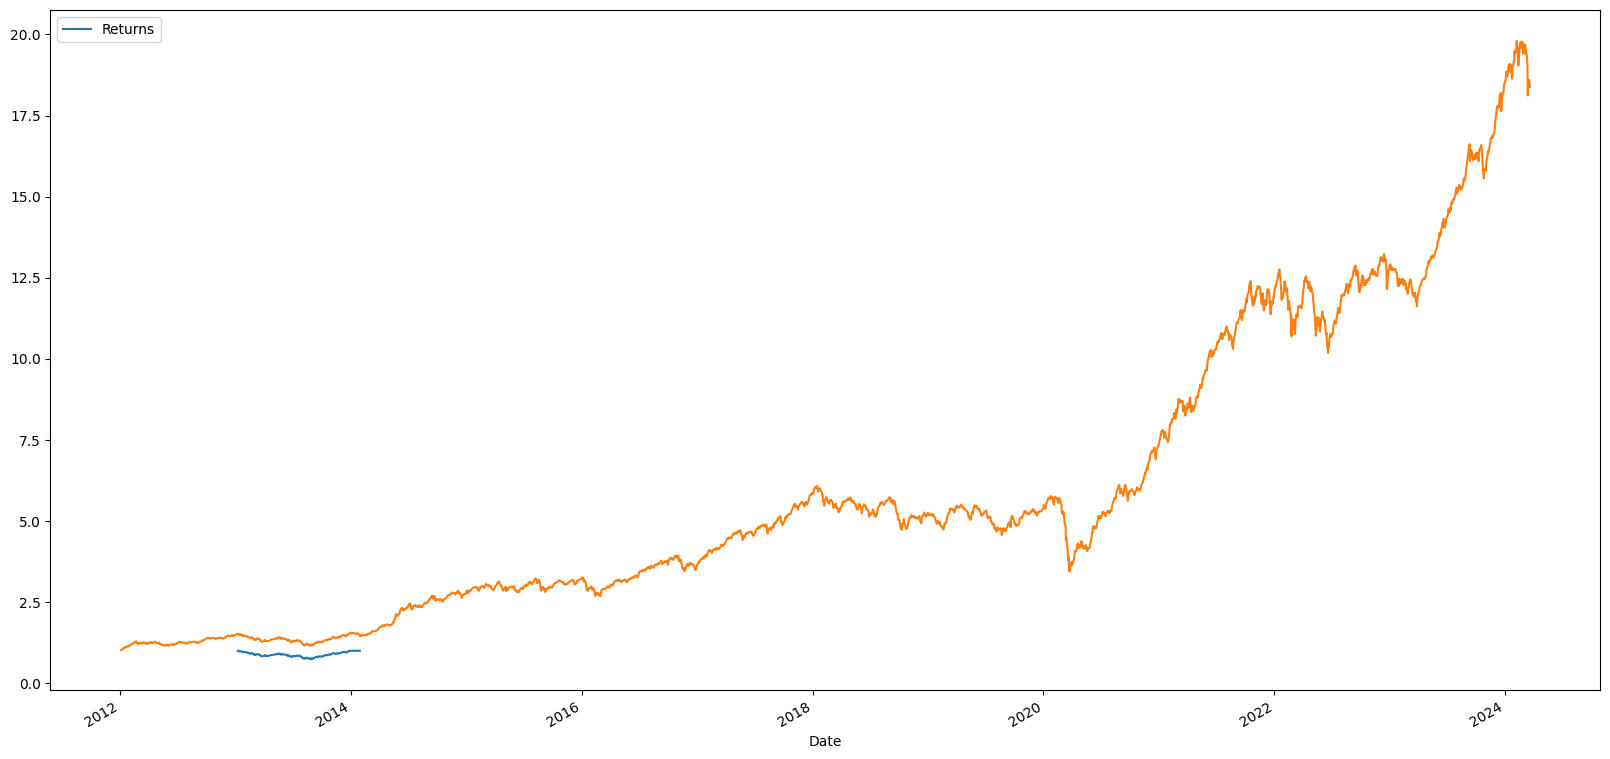

In [68]:
year=2020
np.cumprod(1+FinalData).plot()
np.cumprod(1+Index).plot()

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2013-08-21   2013-08-21
End Period                 2024-03-20   2024-03-20
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       17.0%

Cumulative Return          1,459.24%    118.84%
CAGR﹪                     19.62%       5.24%

Sharpe                     1.62         1.1
Prob. Sharpe Ratio         100.0%       99.98%
Smart Sharpe               1.33         0.9
Sortino                    2.17         1.78
Smart Sortino              1.78         1.47
Sortino/√2                 1.53         1.26
Smart Sortino/√2           1.26         1.04
Omega                      1.59         1.59

Max Drawdown               -43.37%      -14.9%
Longest DD Days            953          912
Volatility (ann.)          17.37%       7.12%
R^2                        0.16         0.16
Information Ratio          -0.08        -0.08
Calmar                 

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2019-05-29  2019-08-22  2020-04-16   324    -14.903230        -13.177806
2  2018-12-20  2019-02-18  2019-03-11    82    -10.690895        -10.200104
3  2016-02-02  2016-02-12  2016-03-18    46     -9.759942         -8.913897
4  2020-05-04  2020-05-18  2020-05-29    26     -6.676542         -6.548812
5  2018-11-12  2018-12-10  2018-12-18    37     -5.379705         -4.051496

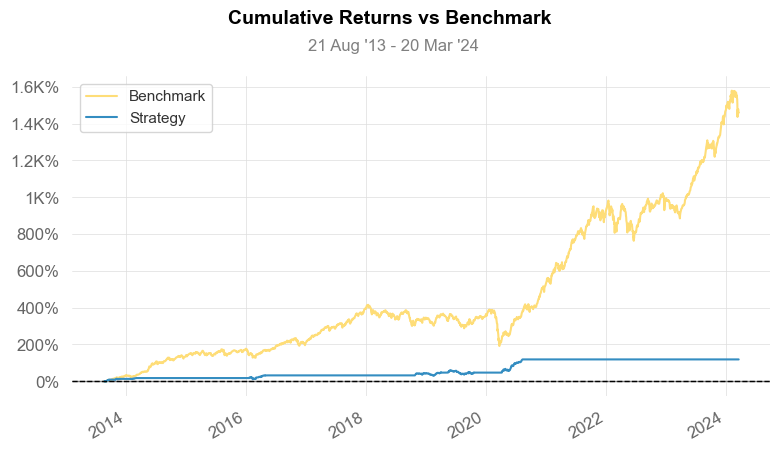

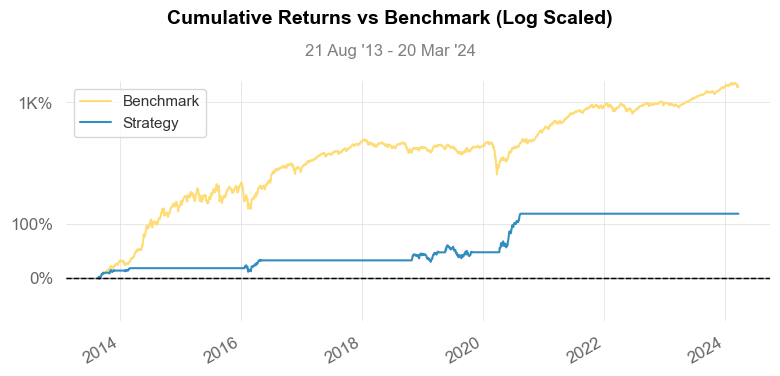

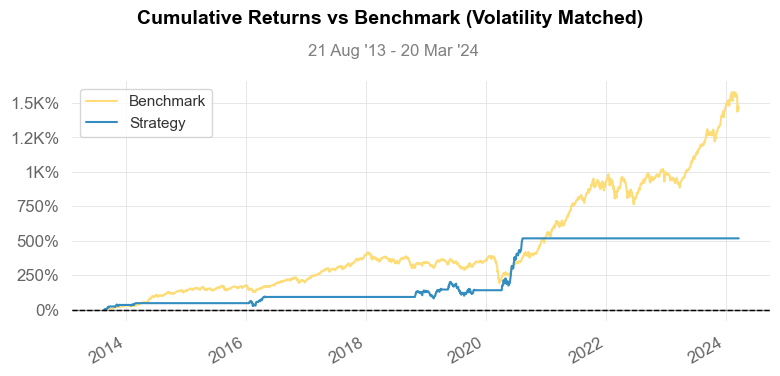

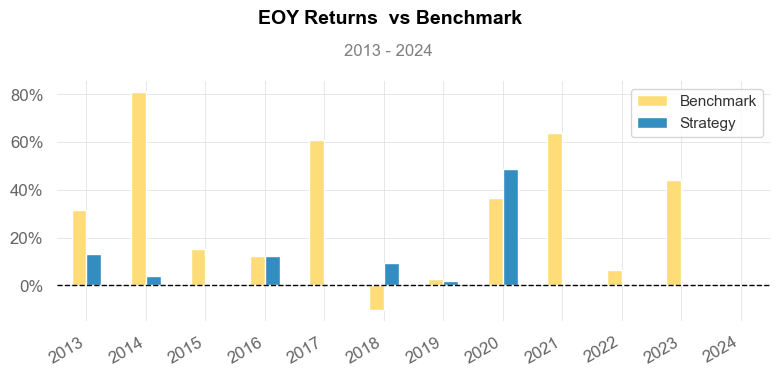

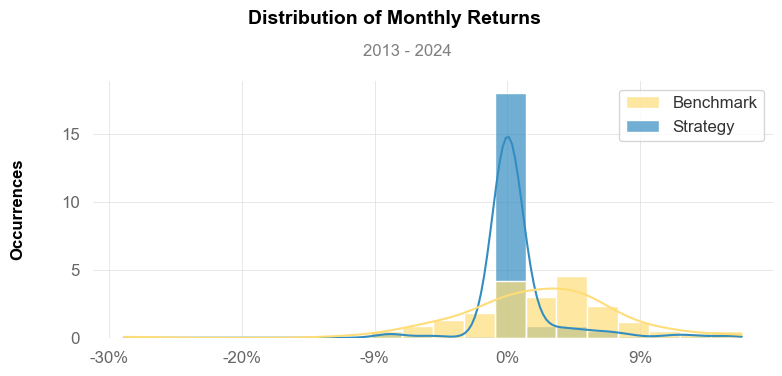

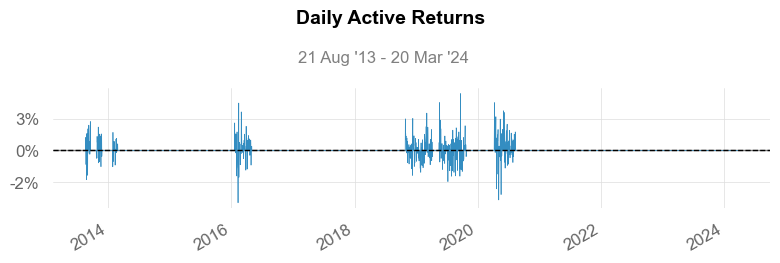

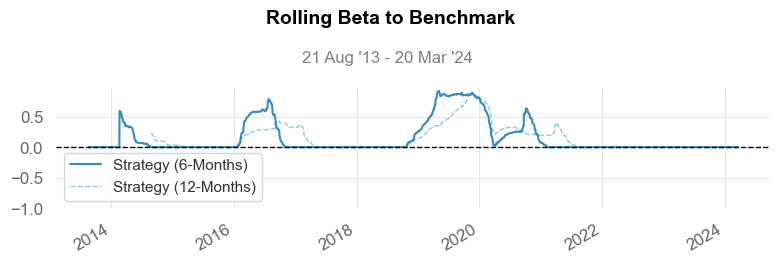

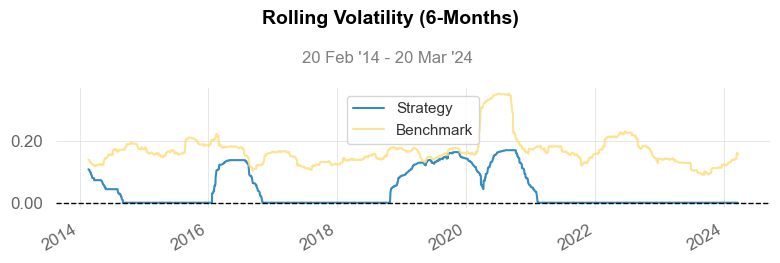

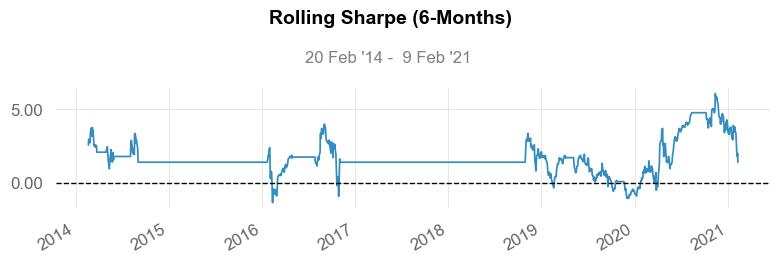

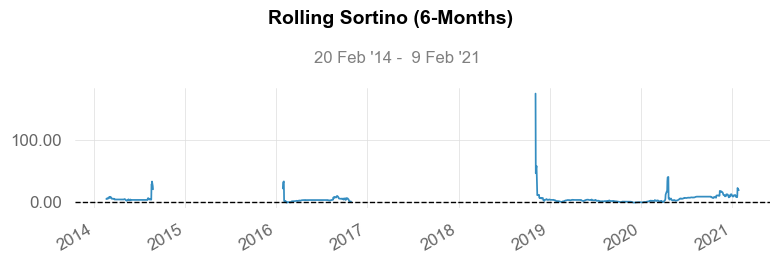

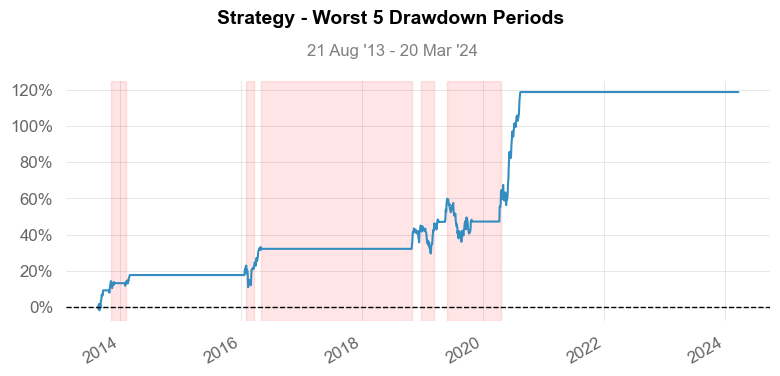

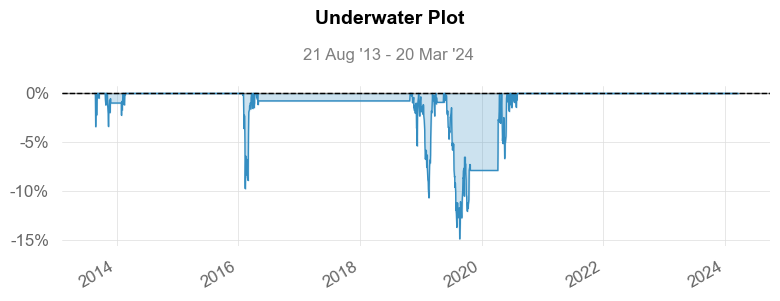

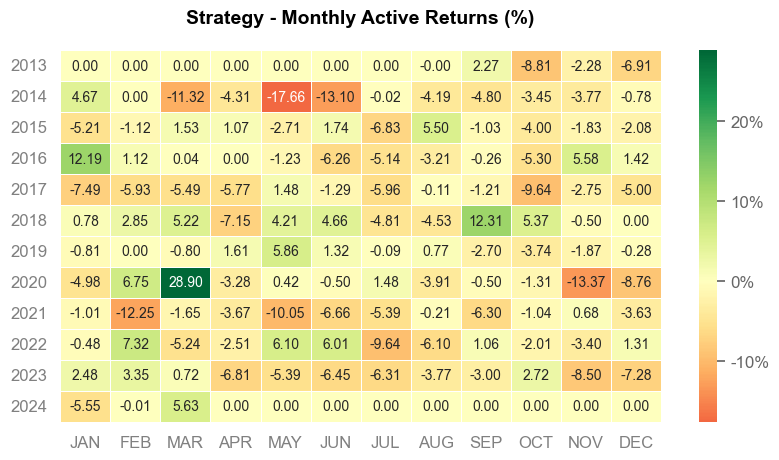

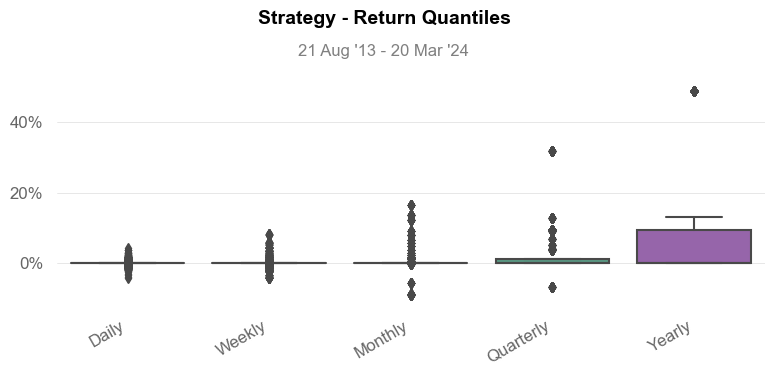

In [122]:
#drawdowns, karma ratio and applications
qs.reports.full(FinalData["Returns"],Index)


In [125]:
qs.reports.html(FinalData['Returns'],Index)


AttributeError: 'NoneType' object has no attribute 'upper'

In [131]:
Stocks
Stocks[Stocks['Industry']== 'Textiles']


Company Name  Industry      Symbol Series     ISIN Code
28     Alok Industries Ltd.  Textiles    ALOKINDS     BE  INE270A01029
263        K.P.R. Mill Ltd.  Textiles     KPRMILL     EQ  INE930H01031
292     Lux Industries Ltd.  Textiles      LUXIND     EQ  INE150G01020
349    Page Industries Ltd.  Textiles     PAGEIND     EQ  INE761H01022
385            Raymond Ltd.  Textiles     RAYMOND     EQ  INE301A01014
461            Trident Ltd.  Textiles     TRIDENT     EQ  INE064C01022
479  Vardhman Textiles Ltd.  Textiles         VTL     EQ  INE825A01020
489     Welspun Living Ltd.  Textiles  WELSPUNLIV     EQ  INE192B01031

In [135]:
set((Stocks["Industry"]))
#to iterate through a set, convert it to a list and then iterate

{'Automobile and Auto Components',
 'Capital Goods',
 'Chemicals',
 'Construction',
 'Construction Materials',
 'Consumer Durables',
 'Consumer Services',
 'Diversified',
 'Fast Moving Consumer Goods',
 'Financial Services',
 'Forest Materials',
 'Healthcare',
 'Information Technology',
 'Media Entertainment & Publication',
 'Metals & Mining',
 'Oil Gas & Consumable Fuels',
 'Power',
 'Realty',
 'Services',
 'Telecommunication',
 'Textiles'}

In [146]:
SectoralETF = ()


In [156]:
ValidStocks=(Stocks[Stocks["Industry"] == 'Textiles']['Symbol']).to_list()
ValidStocks

['ALOKINDS',
 'KPRMILL',
 'LUXIND',
 'PAGEIND',
 'RAYMOND',
 'TRIDENT',
 'VTL',
 'WELSPUNLIV']

In [157]:
PresentStocks = (DataSet.columns).to_list()
PresentStocks

['360ONE.NS',
 '3MINDIA.NS',
 'AARTIDRUGS.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABB.NS',
 'ABBOTINDIA.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'ACC.NS',
 'ACI.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'AEGISCHEM.NS',
 'AETHER.NS',
 'AFFLE.NS',
 'AIAENG.NS',
 'AJANTPHARM.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'ALLCARGO.NS',
 'ALOKINDS.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANGELONE.NS',
 'ANURAS.NS',
 'APARINDS.NS',
 'APLAPOLLO.NS',
 'APLLTD.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ARE&M.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAL.NS',
 'ATGL.NS',
 'ATUL.NS',
 'AUBANK.NS',
 'AUROPHARMA.NS',
 'AVANTIFEED.NS',
 'AWL.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BAJFINANCE.NS',
 'BALAMINES.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'BATAINDIA.NS',
 'BAYERCROP.NS',
 'BBTC.NS',
 'BCG.NS',
 'BDL.NS',
 'BEL.NS',
 'BEML.N

In [155]:
validIntersection=list(set(ValidStocks) & set(PresentStocks))
print(validIntersection)

[]


In [152]:
AvailableSectors=list(set(Stocks["Industry"]))


<Axes: xlabel='Date'>

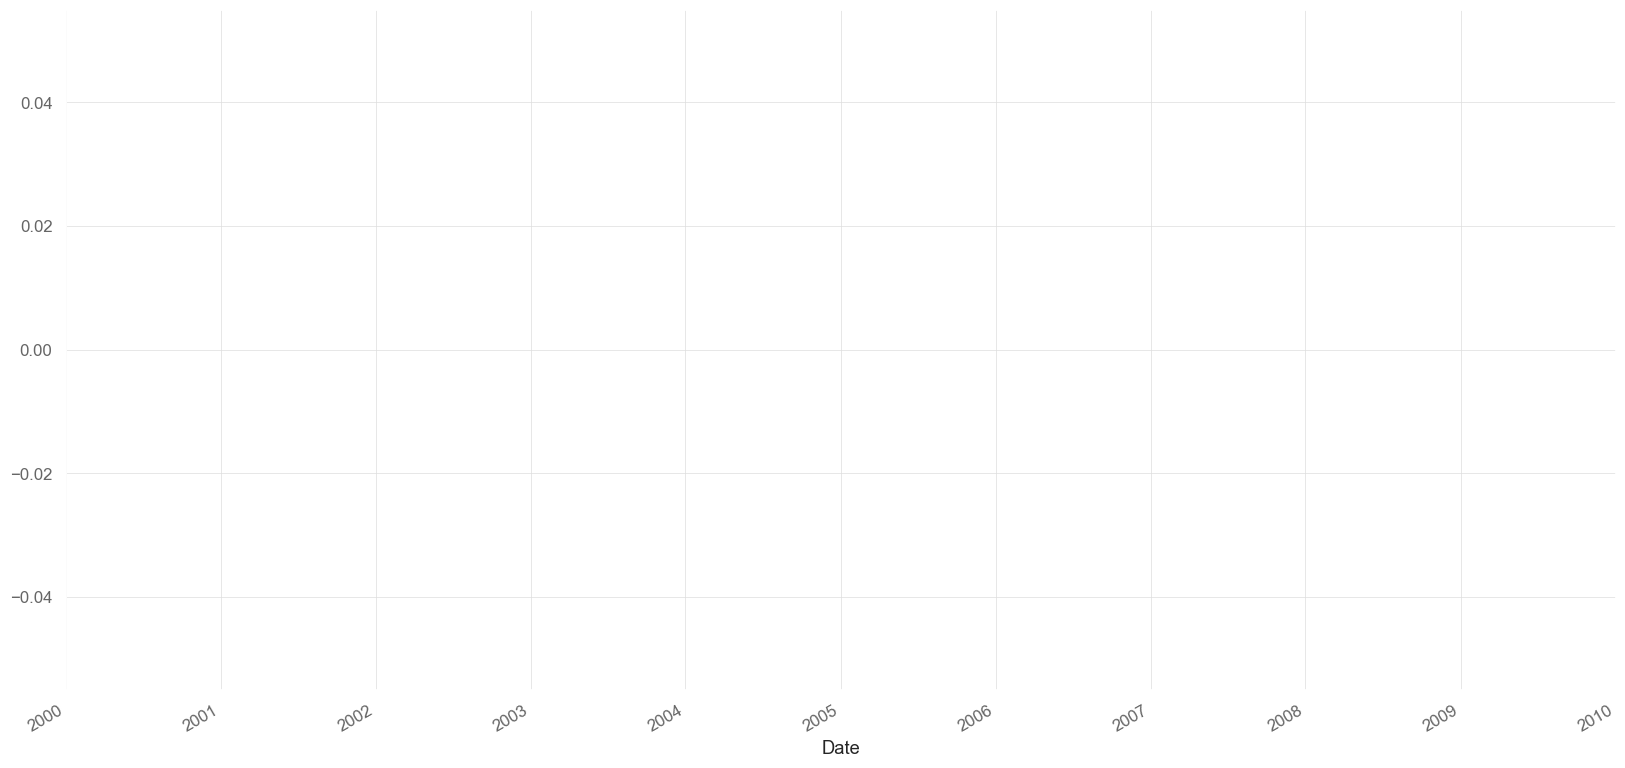

In [153]:
Percentages=DataSet[validIntersection].pct_change()
Index=Percentages.mean(axis=1)
np.cumprod(1+Index).plot()

In [ ]:
#make a dictionary where the key is the name of the sector and the value is a pandas series of an ETF of that sector
#Write a code segment to plot with labels the sector name and its ETF in a chart